In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
print("Set up")

Set up


In [173]:
l = 9998e-4
l_err = 5e-5
mc = 8684e-4
mg = 3762e-4
mp = 757e-4
m_err = 5e-5

In [174]:
data1 = pd.read_csv("../data/data1.csv")
data1["a"] /= 100
data1["xc"] /= 100
data1

,a,xc,t
0,0.480,0.438,32.50
1,0.400,0.365,31.33
2,0.370,0.338,31.20
3,0.325,0.297,30.76
4,0.300,0.277,30.57
5,0.286,0.262,30.52
6,0.236,0.245,30.97
7,0.203,0.188,31.57
8,0.173,0.158,32.63
9,0.142,0.131,34.47


In [175]:
data2 = pd.read_csv("../data/data2.csv")
data2["xc"] /= 100
data2

,xc,t
0,0.407,32.62
1,0.401,32.29
2,0.394,31.93
3,0.385,31.57
4,0.379,31.22
5,0.372,30.92
6,0.361,30.49
7,0.358,30.32
8,0.347,30.03


In [176]:
def g_by_a(a, t):
    return (a**2+l**2/12)*4*m.pi**2/t**2/a

In [177]:
data1["g"] = g_by_a(data1["a"], data1["t"]/20)
data1

,a,xc,t,g
0,0.480,0.438,32.50,9.770714
1,0.400,0.365,31.33,9.785456
2,0.370,0.338,31.20,9.654419
3,0.325,0.297,30.76,9.701818
4,0.300,0.277,30.57,9.761266
5,0.286,0.262,30.52,9.786360
6,0.236,0.245,30.97,9.696782
7,0.203,0.188,31.57,9.717964
8,0.173,0.158,32.63,9.707271
9,0.142,0.131,34.47,9.683628


In [178]:
data1["g"].std()/m.sqrt(len(data1["g"]))

0.032053682975482924

In [179]:
data1["g"].mean()

9.716350113517237

In [180]:
data2["y"] = data2["xc"]*(mg+mp+mc)/mg - mc/mg*(l/2-0.2)
data2["I"] = mc*((l)**2/12+(l/2-0.2)**2)+mg*data2["y"]**2
data2

,xc,t,y,I
0,0.407,32.62,0.736122,0.354295
1,0.401,32.29,0.715064,0.342799
2,0.394,31.93,0.690497,0.329809
3,0.385,31.57,0.658911,0.313774
4,0.379,31.22,0.637854,0.303501
5,0.372,30.92,0.613287,0.291938
6,0.361,30.49,0.574681,0.274685
7,0.358,30.32,0.564153,0.270174
8,0.347,30.03,0.525547,0.254348


In [181]:
def g_by_b(I, t, xc):
    return 4*m.pi**2*I/t**2/(mp+mg+mc)/xc

In [182]:
data2["g"] = g_by_b(data2["I"], data2["t"]/20, data2["xc"])
data2

,xc,t,y,I,g
0,0.407,32.62,0.736122,0.354295,9.784752
1,0.401,32.29,0.715064,0.342799,9.806323
2,0.394,31.93,0.690497,0.329809,9.820082
3,0.385,31.57,0.658911,0.313774,9.780346
4,0.379,31.22,0.637854,0.303501,9.826587
5,0.372,30.92,0.613287,0.291938,9.817843
6,0.361,30.49,0.574681,0.274685,9.789487
7,0.358,30.32,0.564153,0.270174,9.818598
8,0.347,30.03,0.525547,0.254348,9.721549


In [183]:
data1

,a,xc,t,g
0,0.480,0.438,32.50,9.770714
1,0.400,0.365,31.33,9.785456
2,0.370,0.338,31.20,9.654419
3,0.325,0.297,30.76,9.701818
4,0.300,0.277,30.57,9.761266
5,0.286,0.262,30.52,9.786360
6,0.236,0.245,30.97,9.696782
7,0.203,0.188,31.57,9.717964
8,0.173,0.158,32.63,9.707271
9,0.142,0.131,34.47,9.683628


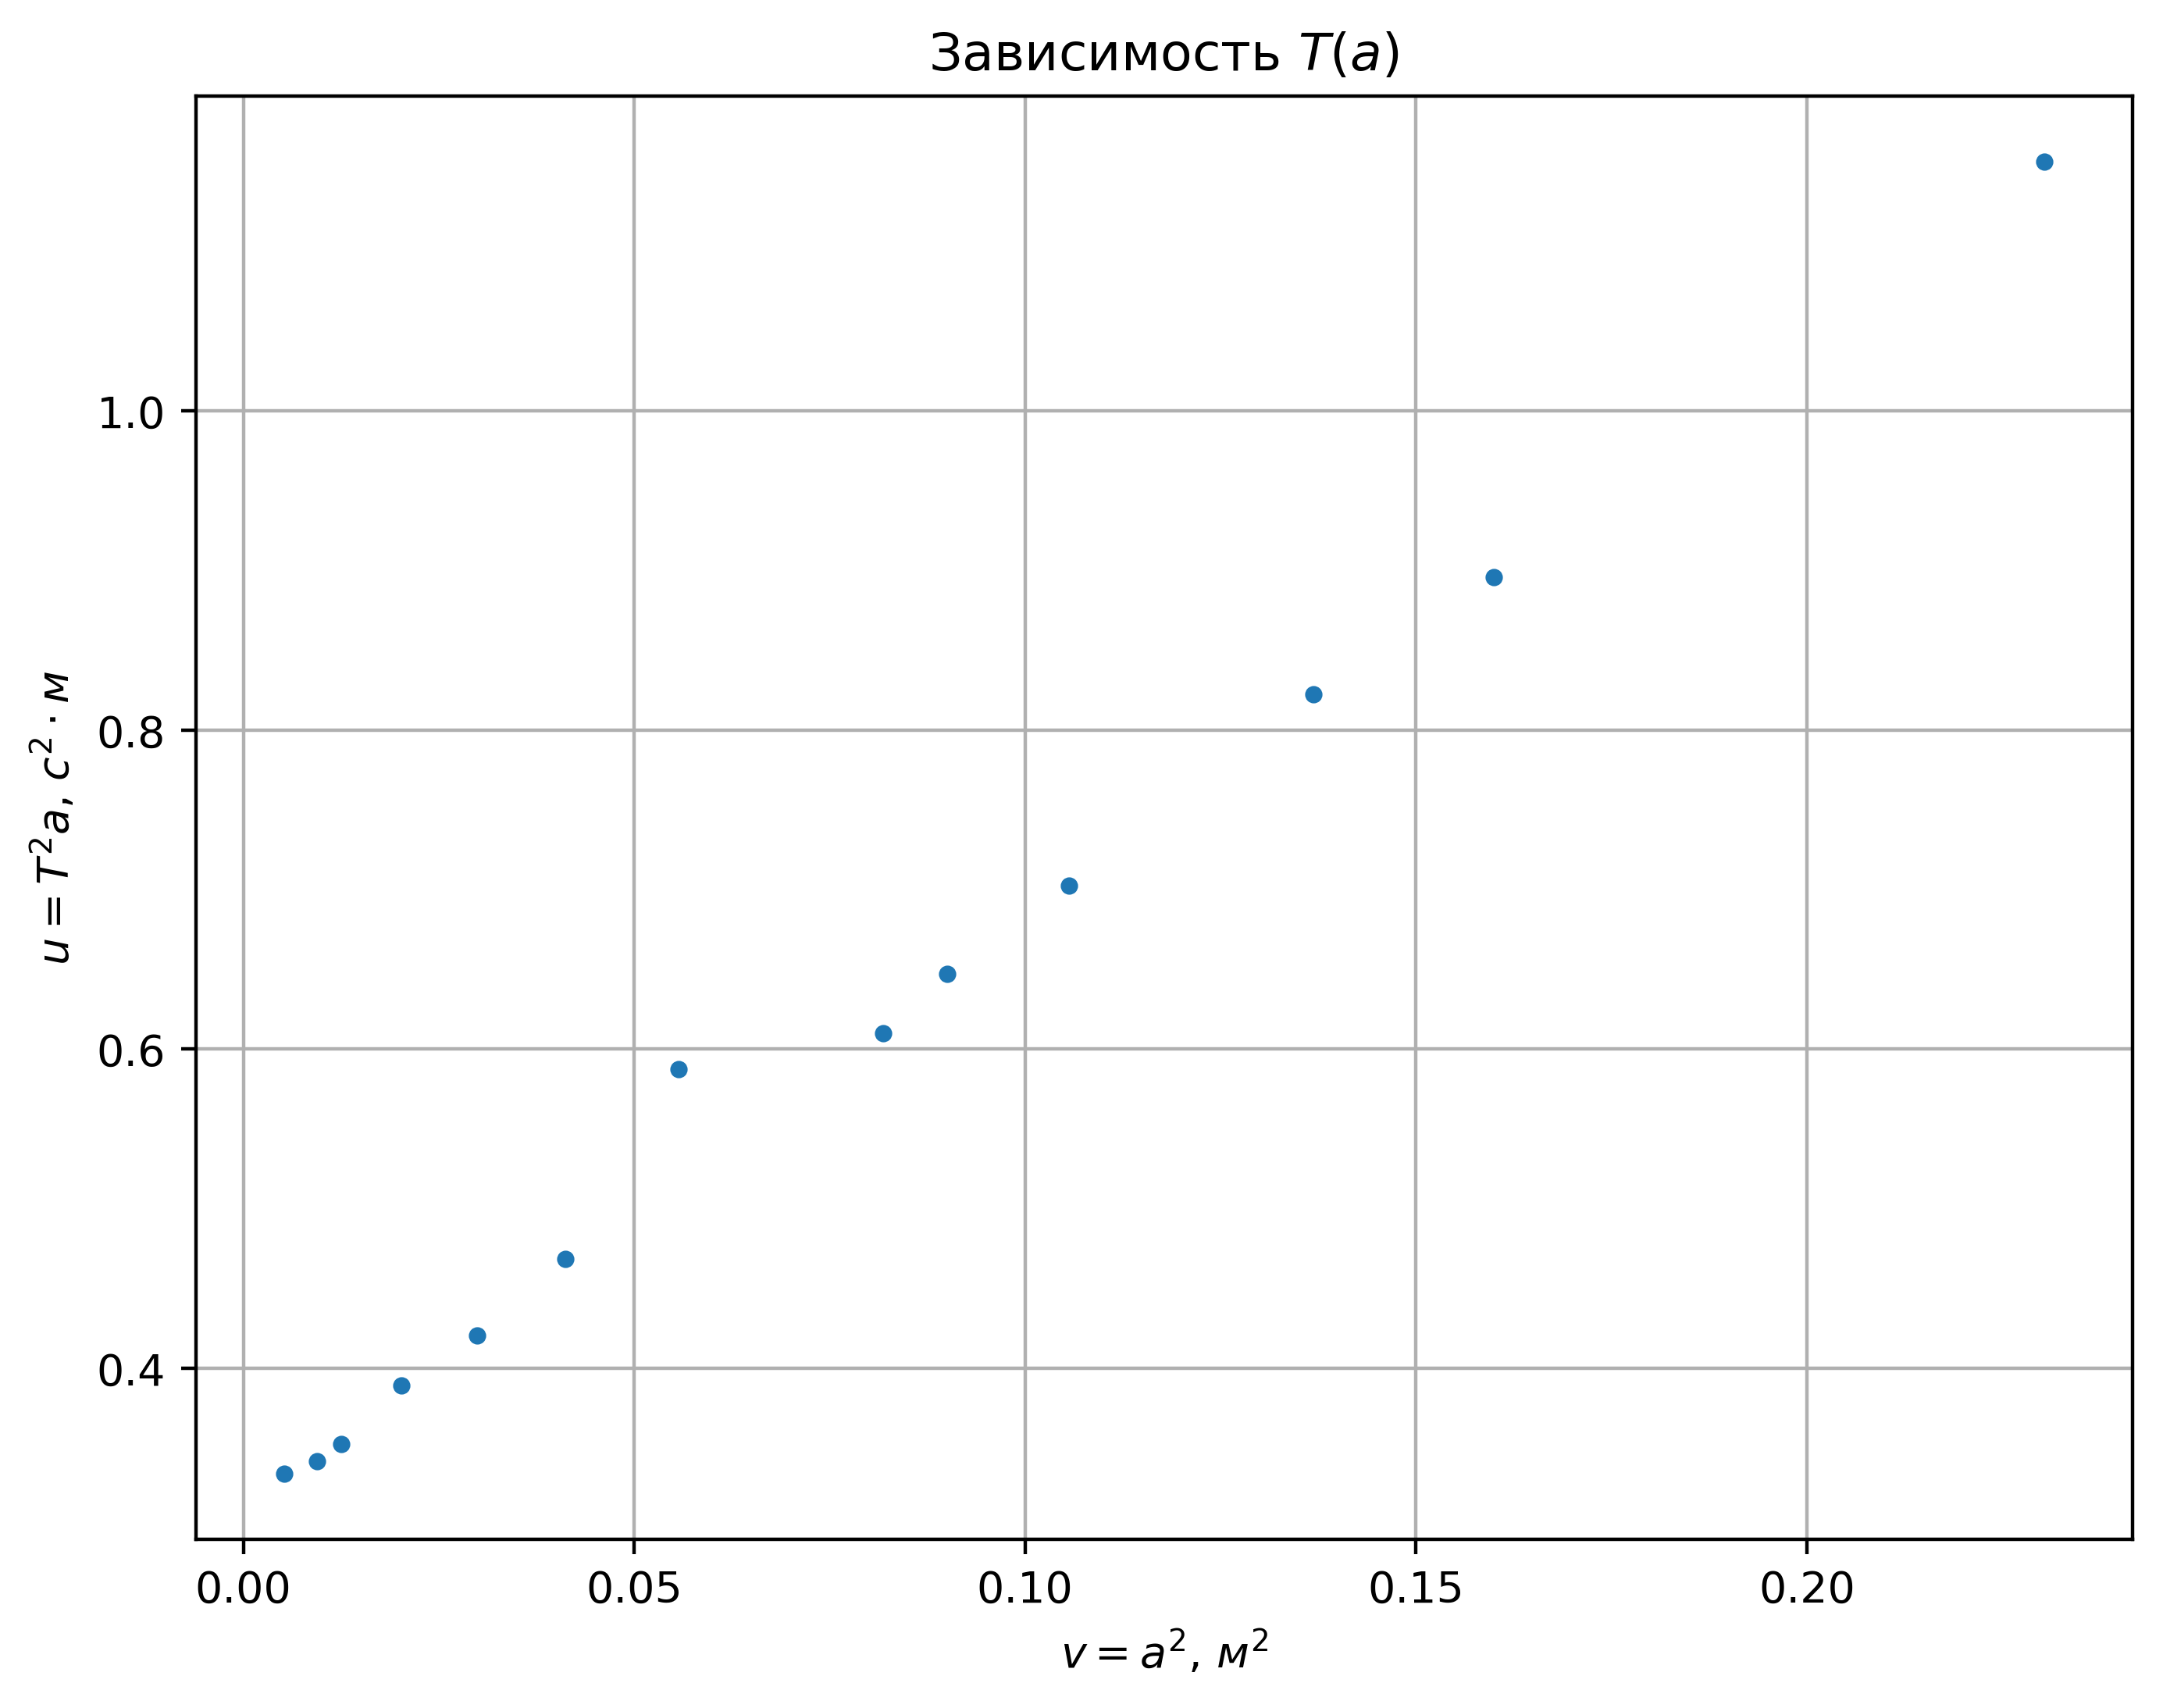

In [184]:
plt.figure(figsize=(8,6), dpi=400) # размер графика
plt.ylabel("$u=T^2 a$, $с^2 \cdot м$") # подписи к осям
plt.xlabel("$v=a^2$, $м^2$")
plt.title('Зависимость $T(a)$')
plt.grid(True) # сетка
plt.plot(data1["a"]**2, data1["t"]**2*data1["xc"]/400, '.')
plt.savefig("../img/a.png")

In [185]:
data1=data1.drop(6)
data1

,a,xc,t,g
0,0.480,0.438,32.50,9.770714
1,0.400,0.365,31.33,9.785456
2,0.370,0.338,31.20,9.654419
3,0.325,0.297,30.76,9.701818
4,0.300,0.277,30.57,9.761266
5,0.286,0.262,30.52,9.786360
7,0.203,0.188,31.57,9.717964
8,0.173,0.158,32.63,9.707271
9,0.142,0.131,34.47,9.683628
10,0.112,0.102,37.17,9.780961


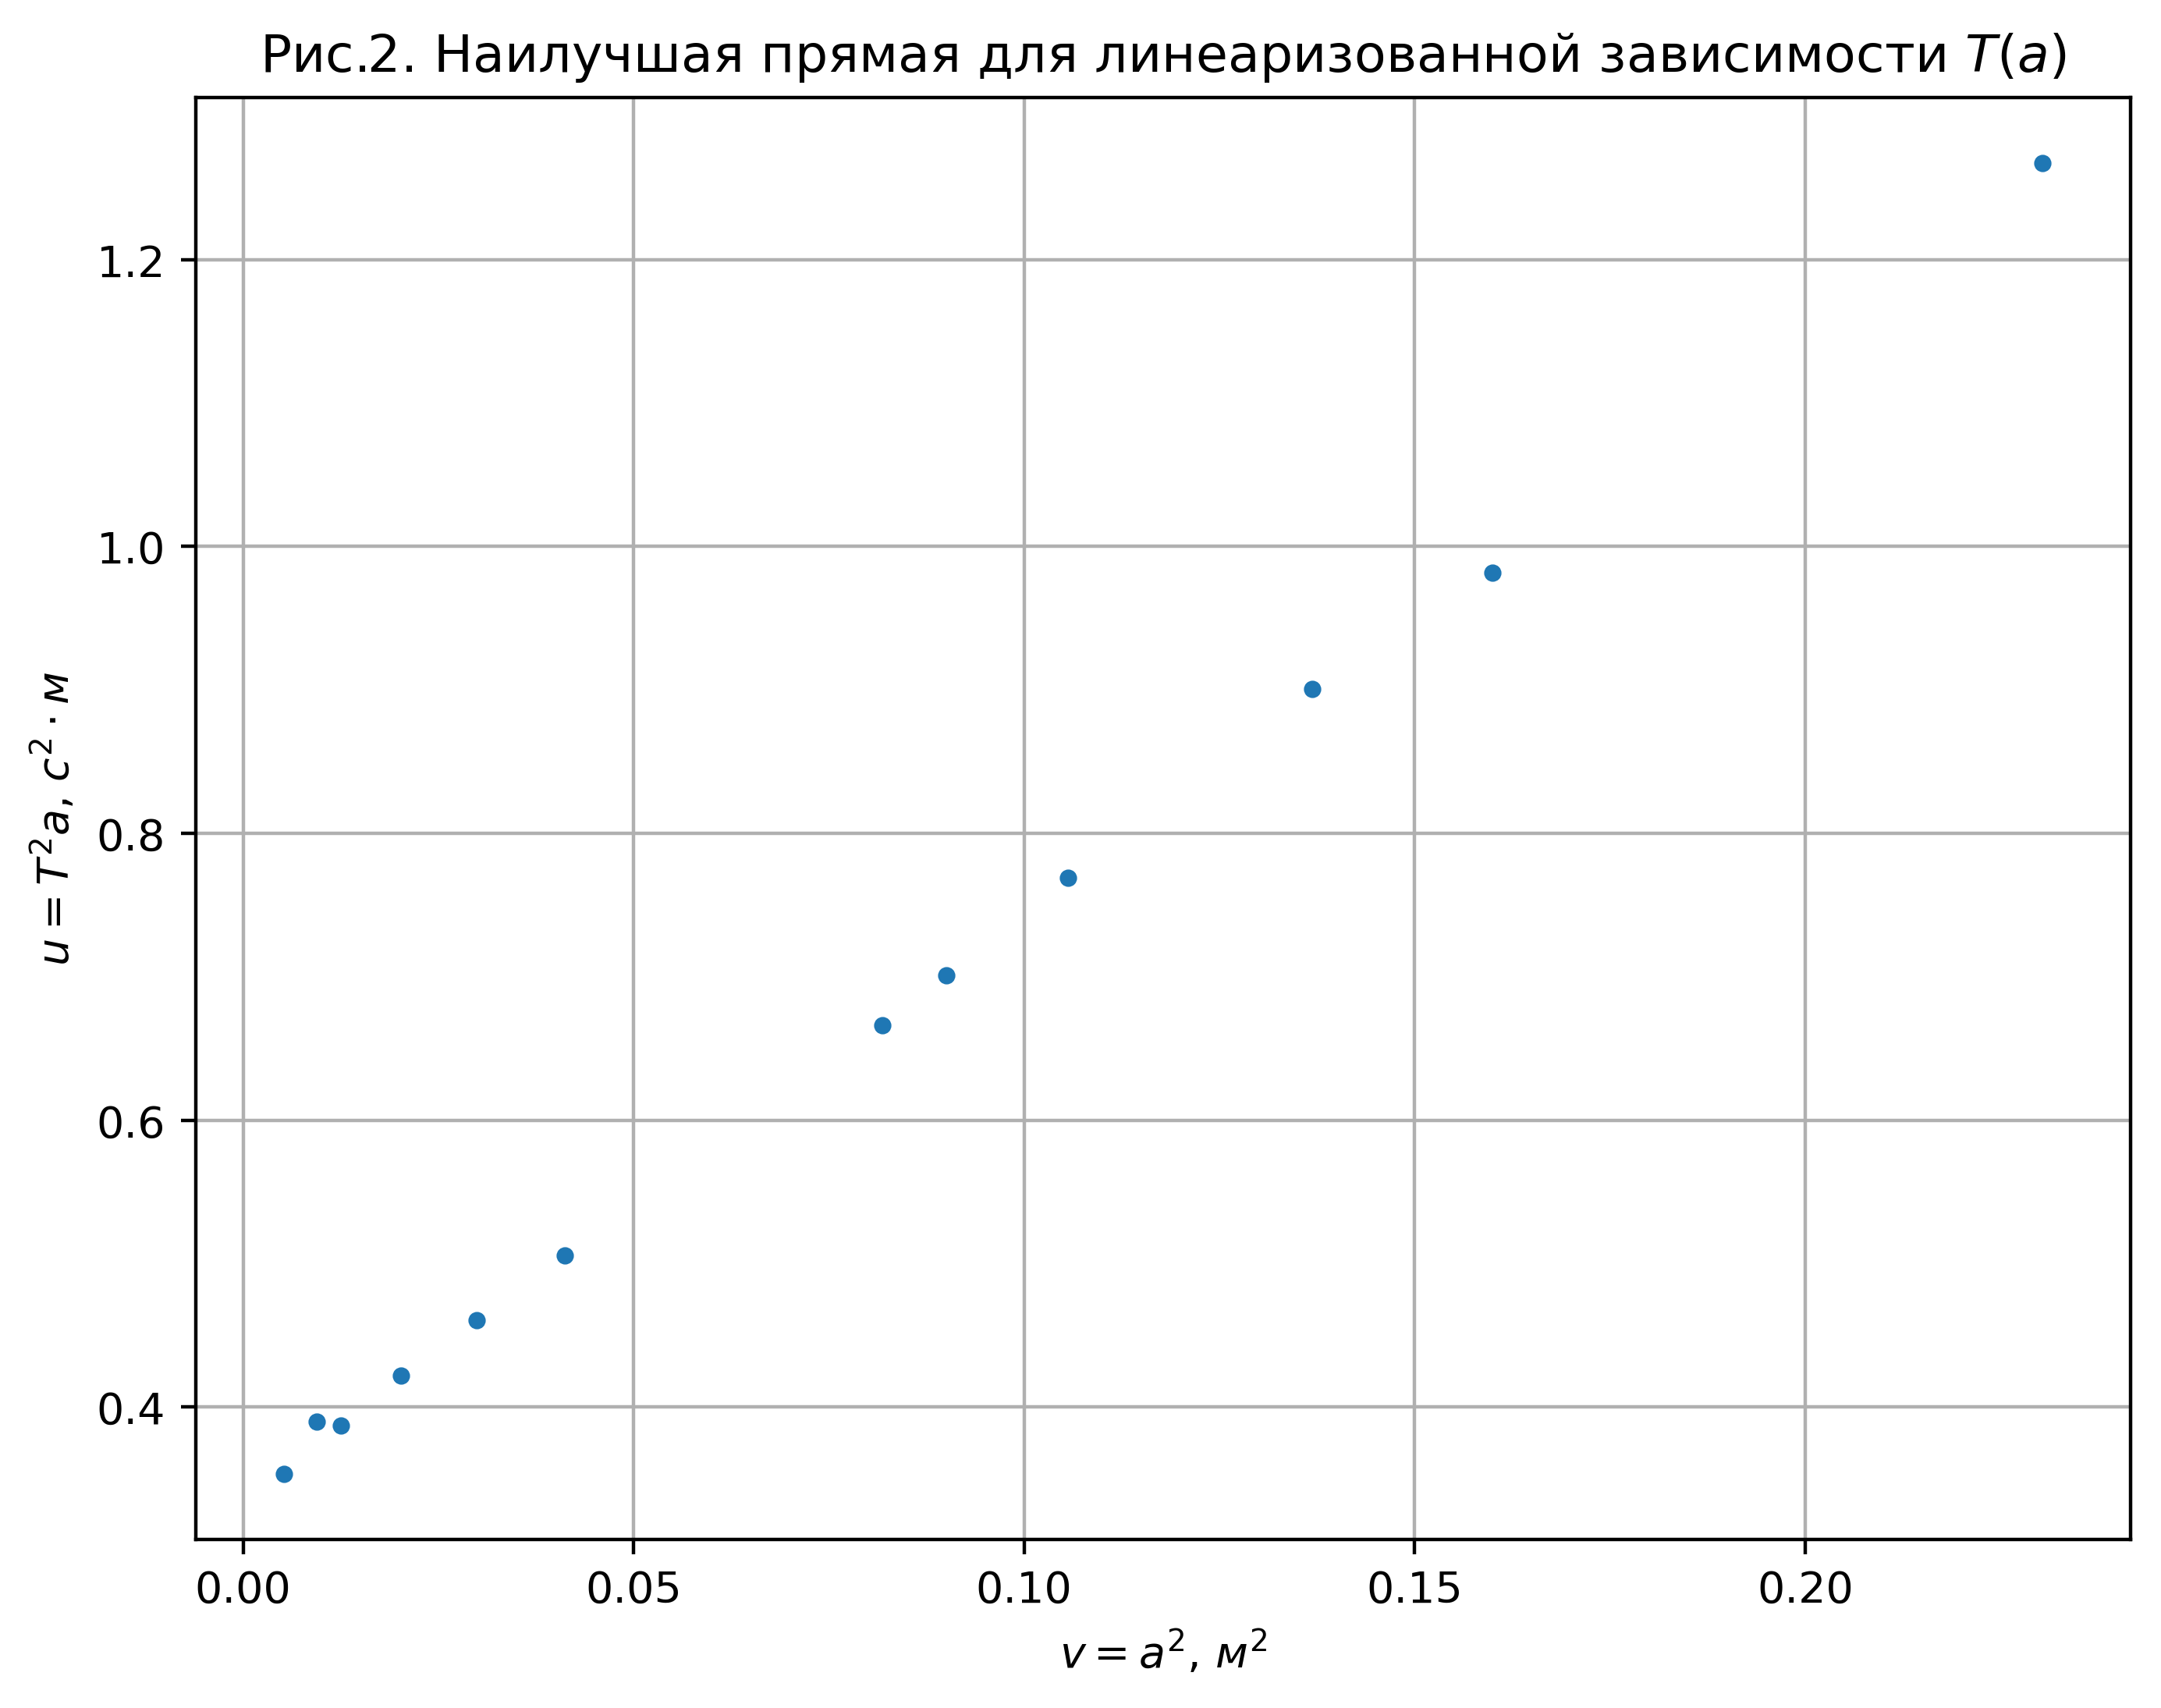

In [186]:
plt.figure(figsize=(8,6), dpi=400) # размер графика
plt.ylabel("$u=T^2 a$, $с^2 \cdot м$") # подписи к осям
plt.xlabel("$v=a^2$, $м^2$")
plt.title('Рис.2. Наилучшая прямая для линеаризованной зависимости $T(a)$')
plt.grid(True) # сетка
x = data1["a"]**2
y = data1["t"]**2*data1["a"]/400
plt.plot(x, y, '.')

4.031502402910558 0.34015877643575726


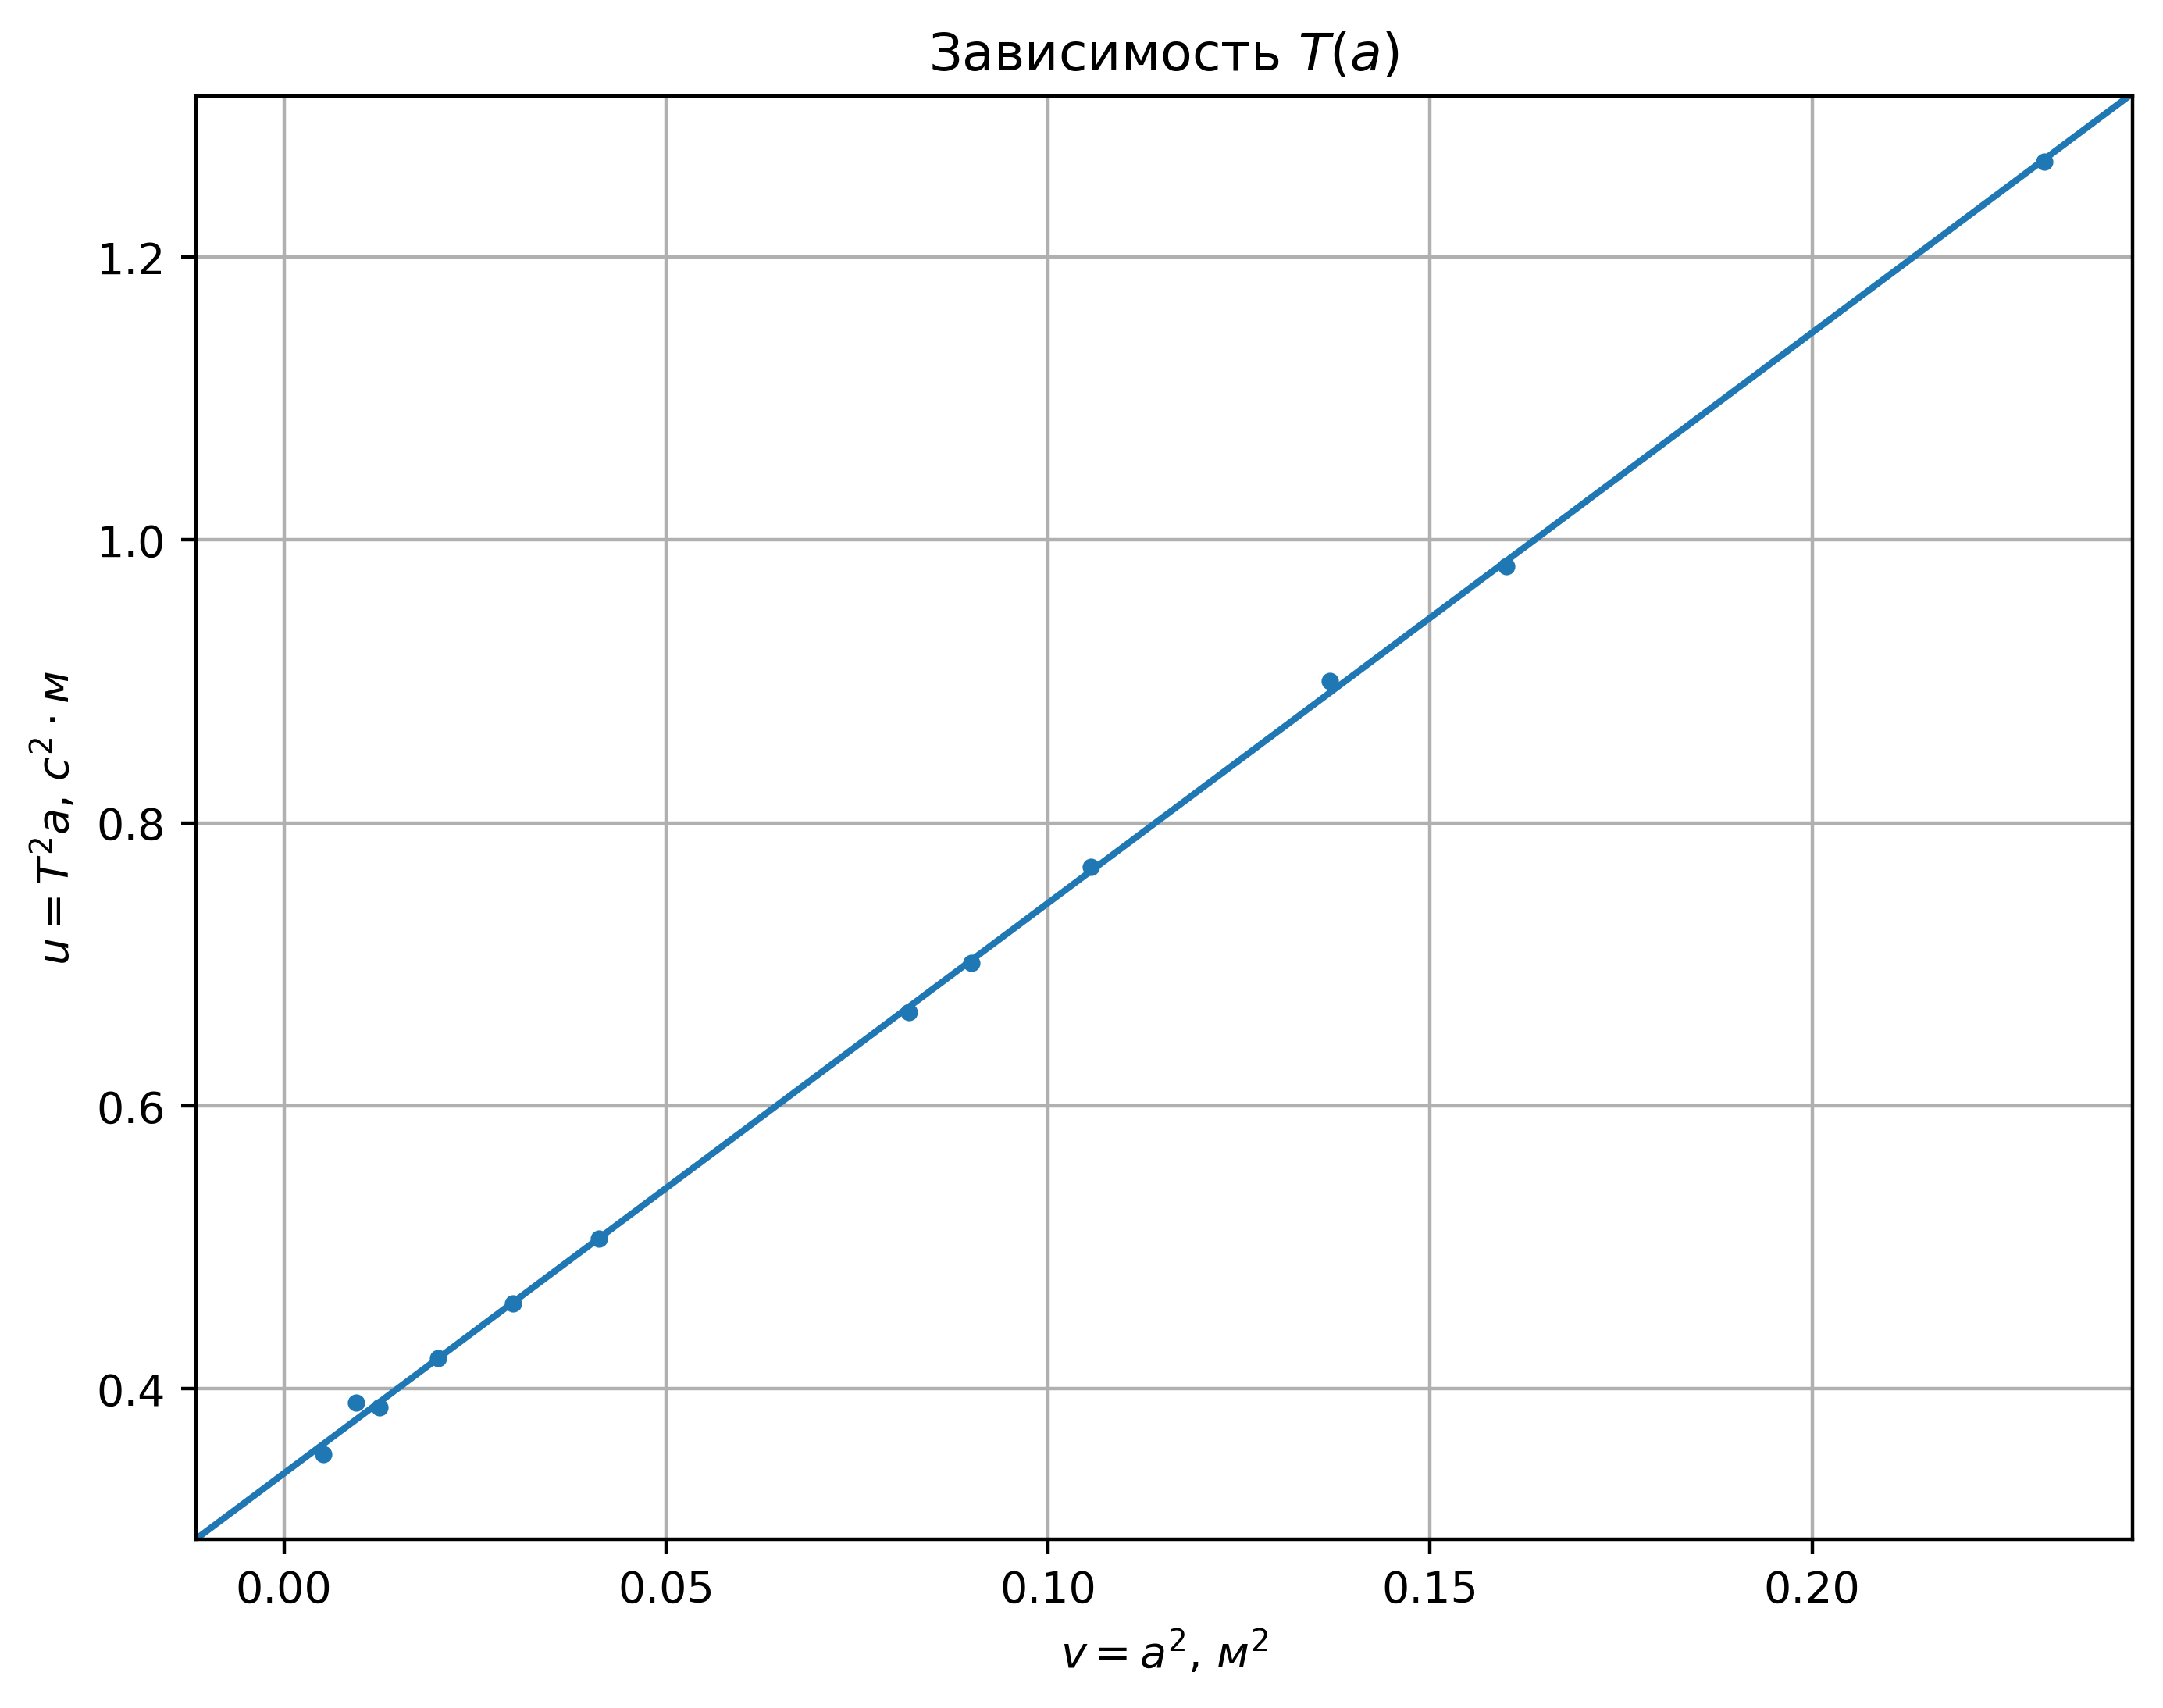

In [187]:
k, b = np.polyfit(x, y, 1)
print(k, b)
plt.figure(figsize=(8,6), dpi=400) # размер графика
plt.ylabel("$u=T^2 a$, $с^2 \cdot м$") # подписи к осям
plt.xlabel("$v=a^2$, $м^2$")
plt.title('Зависимость $T(a)$')
plt.grid(True) # сетка
x = data1["a"]**2
y = data1["t"]**2*data1["a"]/400
plt.plot(x, y, '.')
plt.axline((0, b), (0.2,0.2*k+b))
plt.savefig("../img/b.png")

In [188]:
g = 4*m.pi**2/k
g

9.792482717077347

In [190]:
n = len(data1)
mx = x.mean()
my = y.mean()
mx2 = (x*x).mean()
my2 = (y*y).mean()
mxy = (x*y).mean()
k_err = m.sqrt(1/(n-2)*((my2-my**2)/(mx2-mx**2)-k**2))
g_err = k_err/k*g
b_err = k_err / k * b * m.sqrt(my2)
print(k_err)
print(b_err)
print(g_err)

0.024170045780823077
0.0014395328404764836
0.05870882165636384


In [194]:
t=330.02
n=221
tz = m.log(2)/t
tau = 1/tz
Q = m.pi*n/m.log(2)
print(tz, tau, Q)

0.002100318709653795 476.11821739417564 1001.6515913438099
